In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100


In [58]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3 copy.csv')

In [59]:
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


- Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
THEN TASK 1 check if there are highly correlated features and drop them if there are any.

In [42]:

numerical = Data_Marketing_Customer_Analysis_Round3.select_dtypes(include = np.number)
numerical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
 7   total_claim_amount             10689 non-null  int64
dtypes: int64(8)
memory usage: 668.2 KB


In [43]:
categoricals = Data_Marketing_Customer_Analysis_Round3.select_dtypes(include = np.object)
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   effective_to_date  10689 non-null  object
 5   month              10689 non-null  object
 6   employment_status  10689 non-null  object
 7   gender             10689 non-null  object
 8   location_code      10689 non-null  object
 9   marital_status     10689 non-null  object
 10  policy_type        10689 non-null  object
 11  policy             10689 non-null  object
 12  renew_offer_type   10689 non-null  object
 13  sales_channel      10689 non-null  object
 14  vehicle_class      10689 non-null  object
 15  vehicle_size       10689 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


/var/folders/k8/l3hrl_fn5y7bx5qcfv9y8p900000gn/T/ipykernel_18860/1620112000.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = Data_Marketing_Customer_Analysis_Round3.select_dtypes(include = np.object)


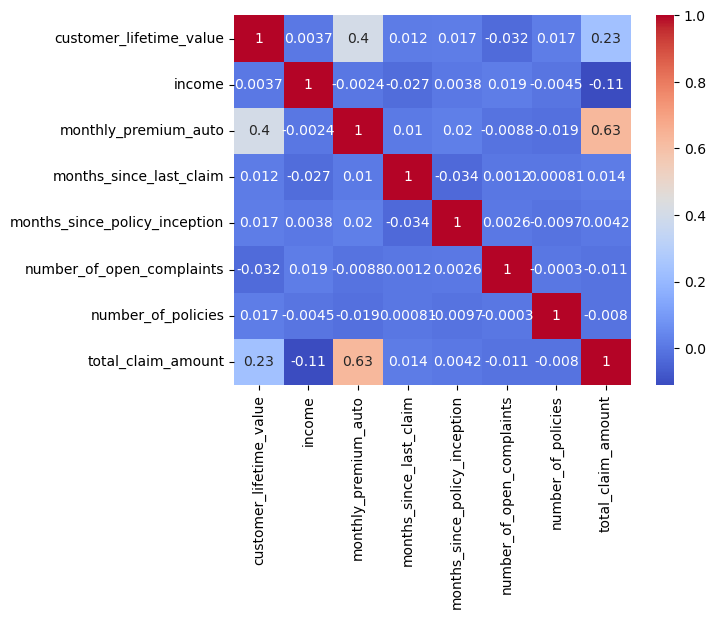

In [60]:

# compute the correlation matrix
corr_matrix = numerical.corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

# highest correlation us 0,63 so  do not need to drop any columns, as only above 0,9 is needed


- One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).


In [69]:
categoricals = categoricals.drop('effective_to_date', axis=1)
categoricals

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


- for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.


In [70]:
categoricals_encoded = pd.get_dummies(categoricals, drop_first=True)
categoricals_encoded

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

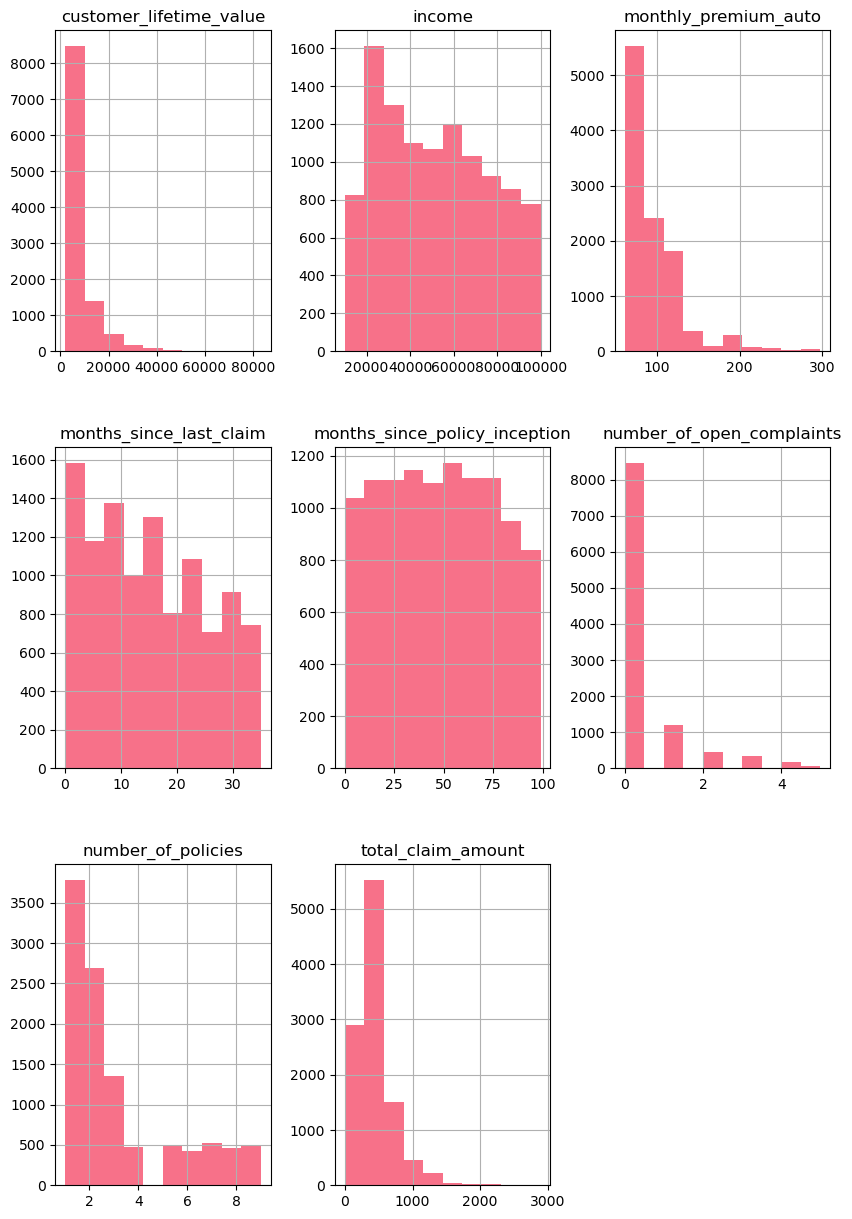

In [71]:
numerical.hist(figsize=(10,15))

Min value of varA_scaled: 0.0
Max value of varB_scaled: 1.0


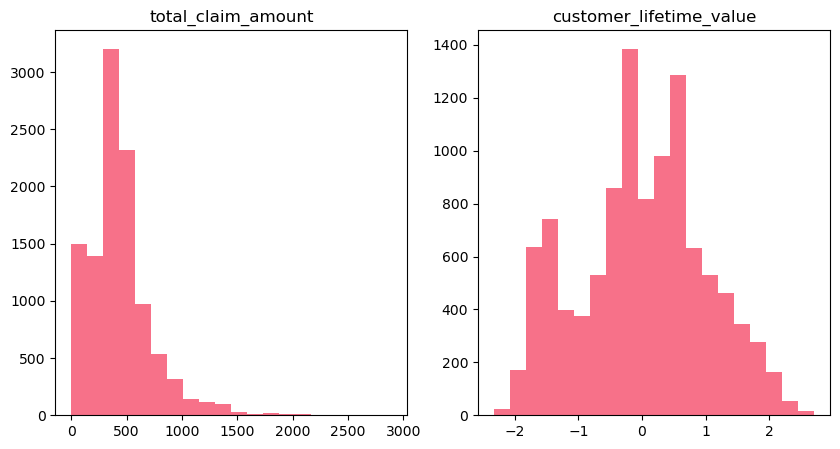

In [87]:
# select variables
varA = 'total_claim_amount'
varB = 'customer_lifetime_value'

from sklearn.preprocessing import minmax_scale

# Apply min-max scaling to varA
varA_scaled = minmax_scale(numerical['total_claim_amount'])
varB_scaled = minmax_scale(numerical['customer_lifetime_value'])

# Print the min and max values of the scaled varA
print("Min value of varA_scaled:", varA_scaled.min())
print("Max value of varB_scaled:", varB_scaled.max())

# create histograms
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(numerical[varA], bins=20)
axs[0].set_title(varA)

axs[1].hist(numerical[varB], bins=20)
axs[1].set_title(varB)

plt.show()

In [85]:
from sklearn.preprocessing import PowerTransformer, minmax_scale

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
customer_lifetime_value_transformed = pt.fit_transform(numerical[['customer_lifetime_value']])

# Apply min-max scaling
customer_lifetime_value_transformed_scaled = minmax_scale(customer_lifetime_value_transformed)

# Replace the original column with the transformed and scaled column
numerical['customer_lifetime_value'] = customer_lifetime_value_transformed_scaled


In [86]:
# instantiate the transformer with the Yeo-Johnson method
pt = PowerTransformer(method='yeo-johnson')

# fit and transform the column
numerical['customer_lifetime_value'] = pt.fit_transform(numerical[['customer_lifetime_value']])

# confirm the transformed column has replaced the original column
print(numerical.head())

   customer_lifetime_value  income  monthly_premium_auto  \
0                -0.321039   48029                    61   
1                -1.914388   92260                    64   
2                 1.281810   22139                   100   
3                 1.700734   49078                    97   
4                 0.654809   23675                   117   

   months_since_last_claim  months_since_policy_inception  \
0                        7                             52   
1                        3                             26   
2                       34                             31   
3                       10                              3   
4                       33                             31   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   9                 292  
1                          0                   1                 744  
2                          0                   2           

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

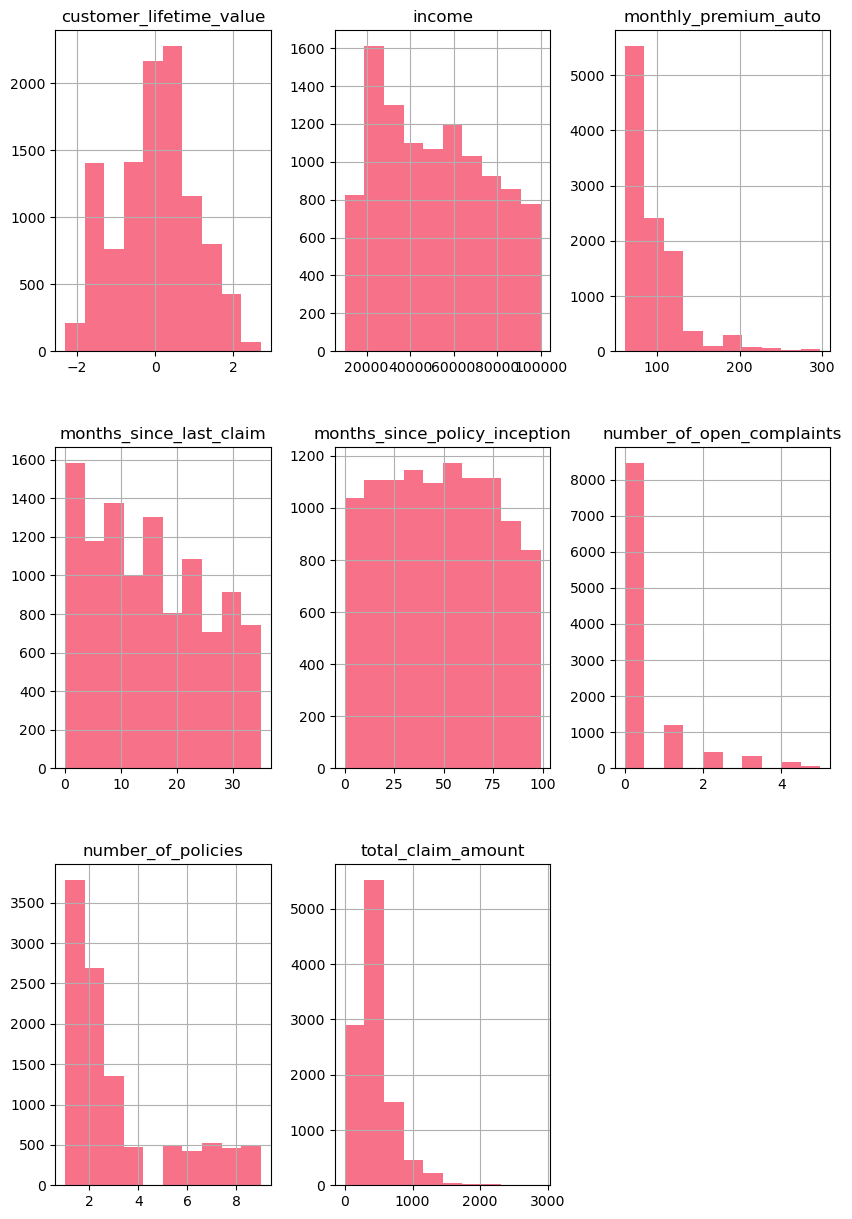

In [78]:
numerical.hist(figsize=(10,15))

In [ ]:
from sklearn.preprocessing import PowerTransformer, minmax_scale

# Apply Box-Cox transformation
pt = PowerTransformer(method='box-cox')
total_claim_amount_transformed = pt.fit_transform(numerical[['total_claim_amount']])

# Apply min-max scaling
total_claim_amount_transformed_scaled = minmax_scale(total_claim_amount_transformed)

# Replace the original column with the transformed and scaled column
numericals['total_claim_amount'] = total_claim_amount_transformed_scaled


Mean of customer_lifetime_value_boxcox: -3.7951575541939e-15
Mean of income_boxcox: -3.292550274171341e-17
Std of customer_lifetime_value_boxcox: 0.999999999999997
Std of income_boxcox: 0.999999999999998
Skewness of customer_lifetime_value_boxcox: 0.0433917788432849
Skewness of income_boxcox: -0.11103268351896158
Mean of customer_lifetime_value_yeo: 4.192688856775909e-15
Mean of income_yeo: 1.5440710528653361e-16
Std of customer_lifetime_value_yeo: 1.000000000000001
Std of income_yeo: 1.0000000000000009
Skewness of customer_lifetime_value_yeo: 0.04341600860309783
Skewness of income_yeo: -0.11102838291637904


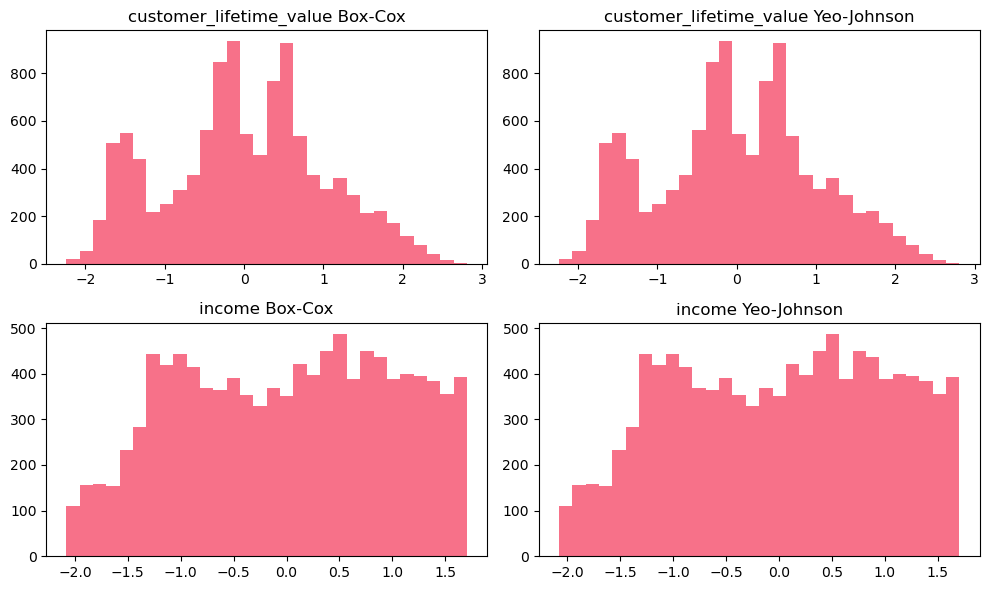

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer

# Load data
data = pd.read_csv('Data_Marketing_Customer_Analysis_Round3 copy.csv')

# Select a numerical feature with a wide range of values
varA = 'customer_lifetime_value'
# Select a numerical feature with a noticeably large skew
varB = 'income'

# Box-Cox transformation
pt = PowerTransformer(method='box-cox')
data[varA+'_boxcox'] = pt.fit_transform(data[[varA]])
data[varB+'_boxcox'] = pt.fit_transform(data[[varB]])

# Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
data[varA+'_yeo'] = pt.fit_transform(data[[varA]])
data[varB+'_yeo'] = pt.fit_transform(data[[varB]])

# Check mean, std, and skewness
print(f'Mean of {varA}_boxcox:', np.mean(data[varA+'_boxcox']))
print(f'Mean of {varB}_boxcox:', np.mean(data[varB+'_boxcox']))
print(f'Std of {varA}_boxcox:', np.std(data[varA+'_boxcox']))
print(f'Std of {varB}_boxcox:', np.std(data[varB+'_boxcox']))
print(f'Skewness of {varA}_boxcox:', stats.skew(data[varA+'_boxcox']))
print(f'Skewness of {varB}_boxcox:', stats.skew(data[varB+'_boxcox']))

print(f'Mean of {varA}_yeo:', np.mean(data[varA+'_yeo']))
print(f'Mean of {varB}_yeo:', np.mean(data[varB+'_yeo']))
print(f'Std of {varA}_yeo:', np.std(data[varA+'_yeo']))
print(f'Std of {varB}_yeo:', np.std(data[varB+'_yeo']))
print(f'Skewness of {varA}_yeo:', stats.skew(data[varA+'_yeo']))
print(f'Skewness of {varB}_yeo:', stats.skew(data[varB+'_yeo']))

# Plot PDF
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes[0, 0].hist(data[varA+'_boxcox'], bins=30)
axes[0, 0].set_title(f'{varA} Box-Cox')
axes[0, 1].hist(data[varA+'_yeo'], bins=30)
axes[0, 1].set_title(f'{varA} Yeo-Johnson')
axes[1, 0].hist(data[varB+'_boxcox'], bins=30)
axes[1, 0].set_title(f'{varB} Box-Cox')
axes[1, 1].hist(data[varB+'_yeo'], bins=30)
axes[1, 1].set_title(f'{varB} Yeo-Johnson')
plt.tight_layout()
plt.show()
